In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Load dataset
data = pd.read_csv('blood.csv')

# Preview the dataset
data.head()


,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,99,1
1,0,13,3250,28,1
2,1,17,4000,36,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

# Check the shape of the dataset
print(data.shape)

# Checking data types
print(data.info())


Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64
          Recency   Frequency      Monetary        Time      Class
count  533.000000  533.000000    533.000000  533.000000  533.00000
mean     9.529081    6.992495   1747.654784   42.307692    0.27955
std      8.250860    6.268727   1566.468760   23.299276    0.44920
min      0.000000    1.000000    250.000000    2.000000    0.00000
25%      3.000000    3.000000    750.000000   26.000000    0.00000
50%      8.000000    5.000000   1250.000000   38.000000    0.00000
75%     14.000000    9.000000   2250.000000   58.000000    1.00000
max     74.000000   50.000000  12500.000000   99.000000    1.00000
(533, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    533 non-null    int64
 1   Frequency  533 non-null    int64
 2   Monetary   533 non-null    int64
 3   T

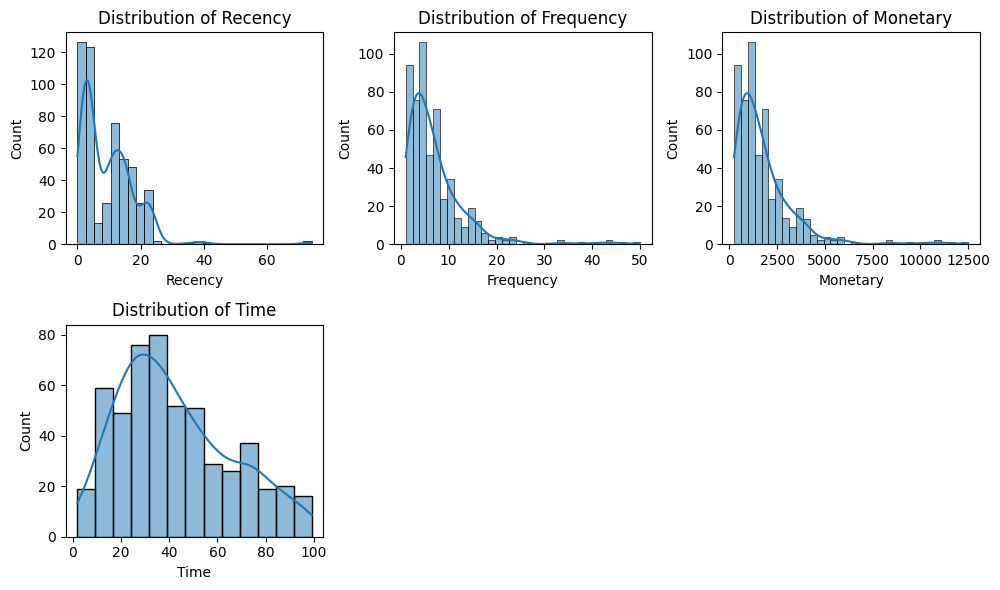

In [4]:
# Visualize distributions
plt.figure(figsize=(10, 6))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


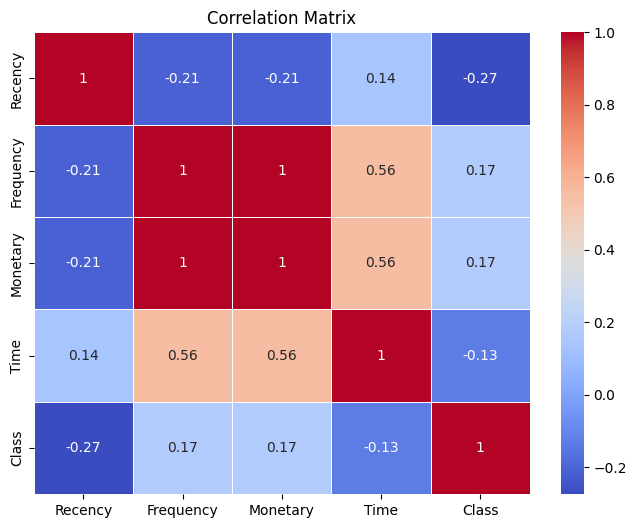

In [5]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


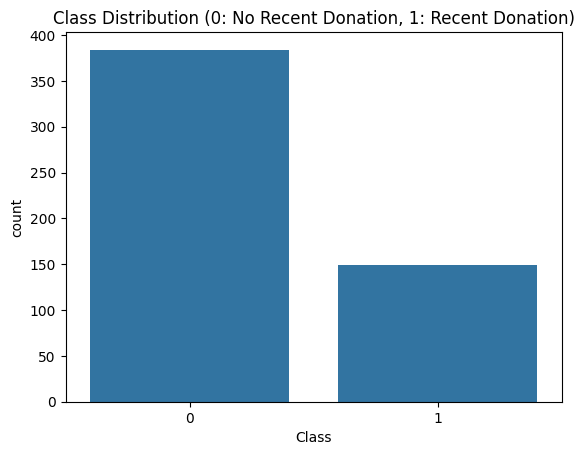

In [6]:
# Class balance
sns.countplot(x='Class', data=data)
plt.title('Class Distribution (0: No Recent Donation, 1: Recent Donation)')
plt.show()


In [7]:
X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
# Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)


In [10]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


[[94 24]
 [26 16]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       118
           1       0.40      0.38      0.39        42

    accuracy                           0.69       160
   macro avg       0.59      0.59      0.59       160
weighted avg       0.68      0.69      0.69       160

Accuracy: 0.6875


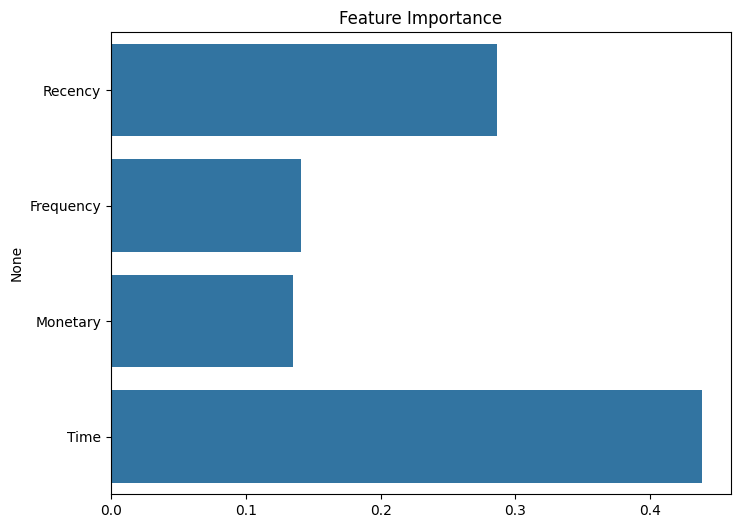

In [11]:
# Feature importance
importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=importance, y=features)
plt.title('Feature Importance')
plt.show()


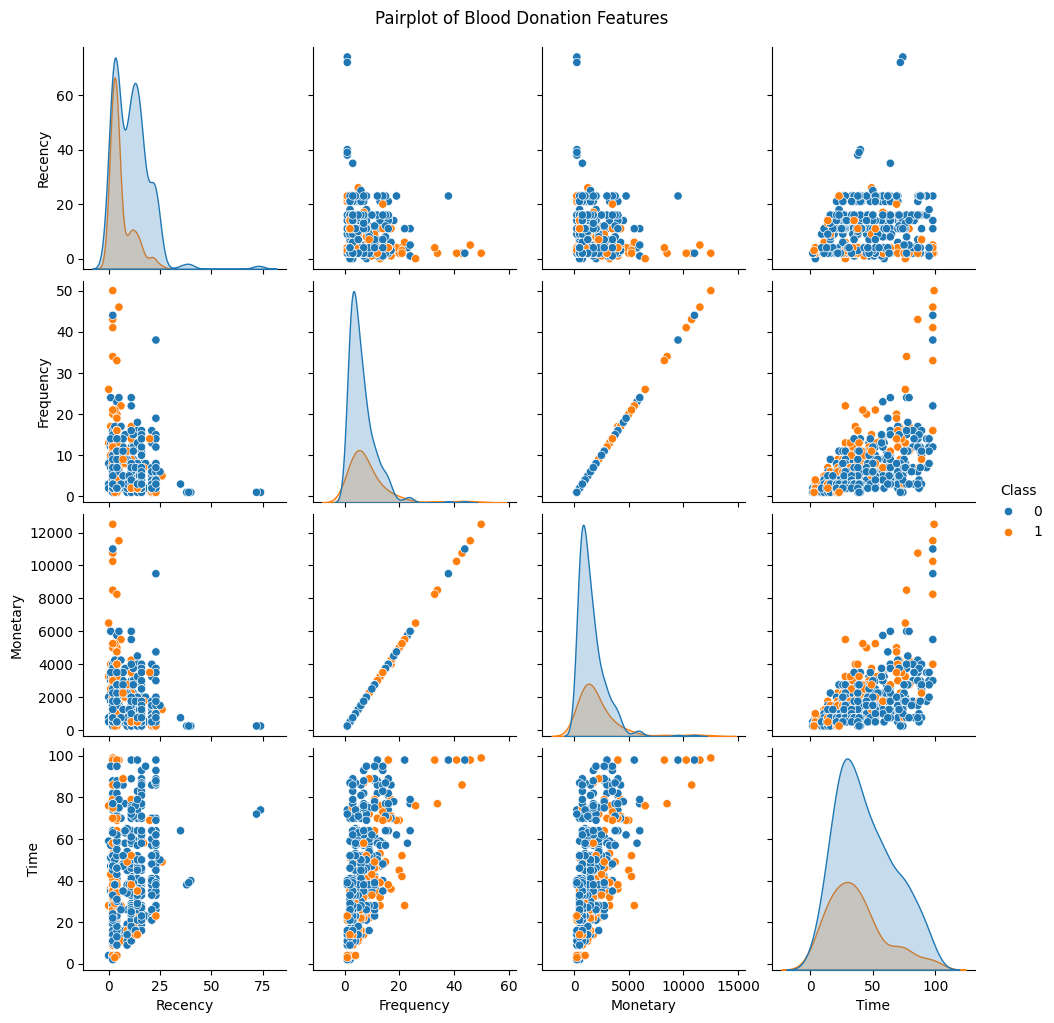

In [12]:
# Pairplot to visualize relationships between features
sns.pairplot(data, hue='Class')
plt.suptitle('Pairplot of Blood Donation Features', y=1.02)
plt.show()

In [13]:
# Create interaction terms
data['Recency_Frequency'] = data['Recency'] * data['Frequency']
data['Recency_Monetary'] = data['Recency'] * data['Monetary']
data['Frequency_Monetary'] = data['Frequency'] * data['Monetary']

# Update feature set
X = data.drop('Class', axis=1)
y = data['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[91 27]
 [26 16]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       118
           1       0.37      0.38      0.38        42

    accuracy                           0.67       160
   macro avg       0.57      0.58      0.58       160
weighted avg       0.67      0.67      0.67       160



In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize model and RFE
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features

# Fit RFE
rfe = rfe.fit(X_train_scaled, y_train)

# Get feature rankings
features = X.columns
print("Selected Features: ", features[rfe.support_])
print("Feature Ranking: ", rfe.ranking_)


Selected Features:  Index(['Frequency', 'Monetary', 'Time', 'Recency_Frequency',
       'Recency_Monetary'],
      dtype='object')
Feature Ranking:  [2 1 1 1 1 1 3]


In [15]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"Model: {name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")


Model: Random Forest
[[91 27]
 [26 16]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       118
           1       0.37      0.38      0.38        42

    accuracy                           0.67       160
   macro avg       0.57      0.58      0.58       160
weighted avg       0.67      0.67      0.67       160

Accuracy: 0.66875

Model: Support Vector Classifier
[[109   9]
 [ 35   7]]
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       118
           1       0.44      0.17      0.24        42

    accuracy                           0.72       160
   macro avg       0.60      0.55      0.54       160
weighted avg       0.67      0.72      0.68       160

Accuracy: 0.725

Model: K-Nearest Neighbors
[[96 22]
 [26 16]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       118
           1       0.42      0.38      0.40        42

    

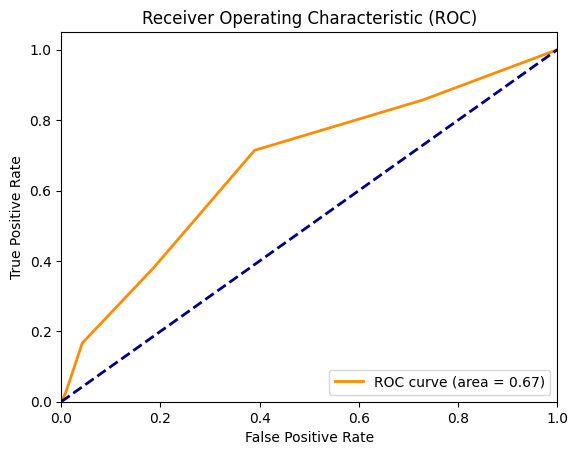

In [16]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [17]:
from sklearn.model_selection import cross_val_score

# Evaluate model using cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()}")


Cross-validation scores: [0.68       0.74666667 0.65333333 0.72972973 0.7972973 ]
Mean CV score: 0.7214054054054054


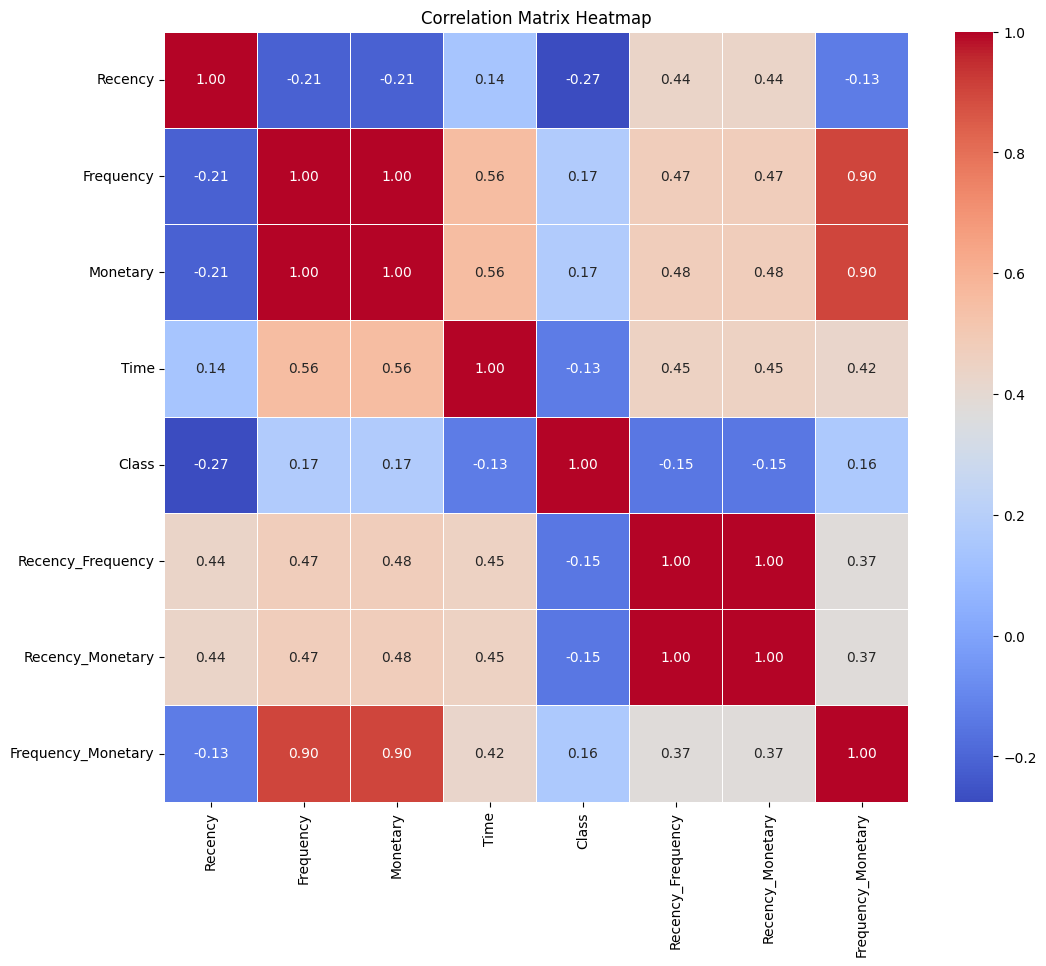

In [18]:
# Compute correlation matrix
corr = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Define which columns are numerical and which are categorical
numerical_features = ['Recency', 'Frequency', 'Monetary', 'Time']
categorical_features = []  # Add your categorical columns here if any

# Create a transformer for numerical and categorical preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Create a pipeline that includes the preprocessor and the classifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Recency', 'Frequency',
                                                   'Monetary', 'Time']),
                                                 ('cat', OneHotEncoder(),
                                                  [])])),
                ('classifier', RandomForestClassifier(random_state=42))])